**TP53**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your Titanic dataset
df = pd.read_csv("/content/train.csv")

# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Dataset info
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()

# Quick look at categorical column counts
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Value counts for Name:
 Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                     

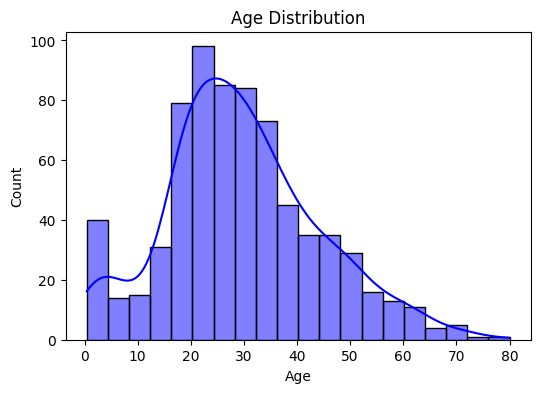

/tmp/ipython-input-4133266819.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='pastel')


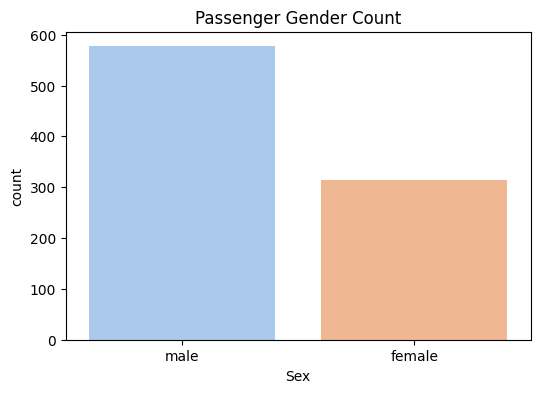

In [4]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

# Gender count
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title("Passenger Gender Count")
plt.show()


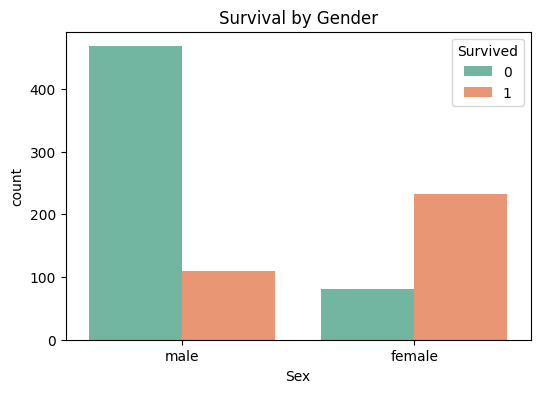

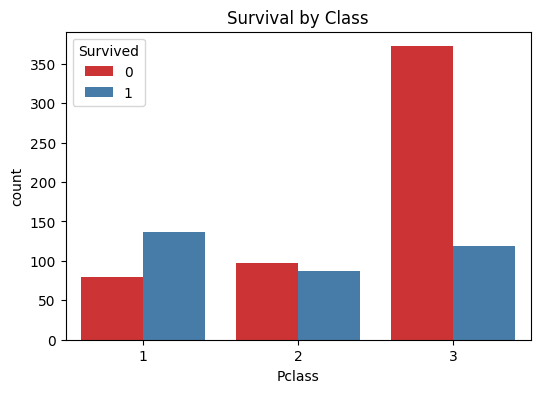

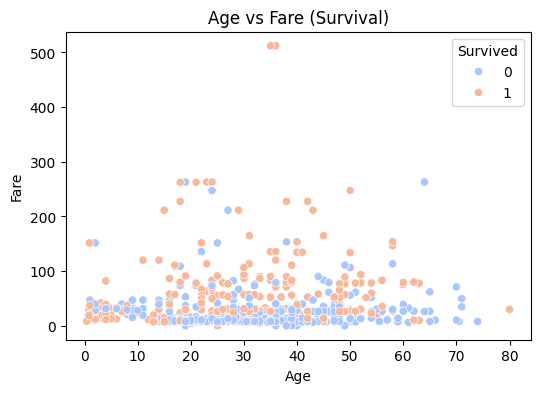

In [5]:
# Survival count by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival by Gender")
plt.show()

# Survival by passenger class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Class")
plt.show()

# Age vs Fare scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title("Age vs Fare (Survival)")
plt.show()


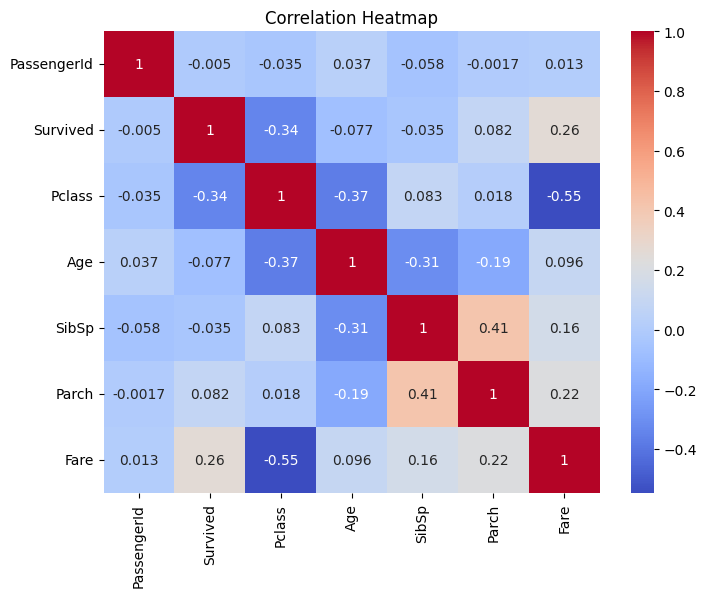

In [6]:
# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


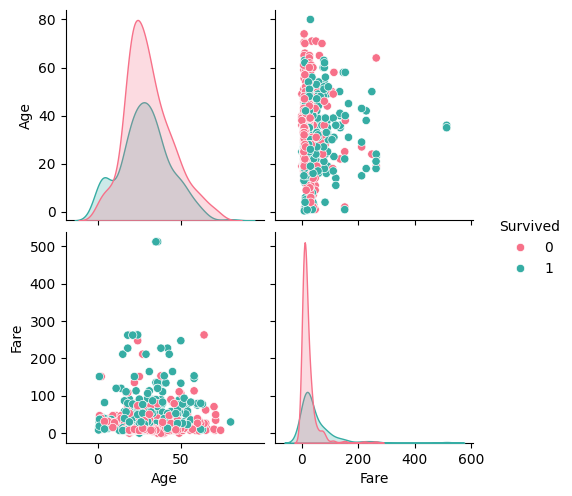

In [7]:
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived', palette='husl')
plt.show()


Survival was mainly influenced by gender, passenger class, and fare paid. Females and 1st-class passengers with higher fares had significantly better survival rates. Age showed little impact on survival, and while most passengers were in their 20s–40s, age overlapped between survivors and non-survivors. Overall, paying more and being in a higher class strongly increased survival chances.